In [1]:
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse import spdiags
import codecs
import json
import time
import matplotlib.pyplot as plt
from scipy.sparse.linalg import LinearOperator
from typing_extensions import Self
import glob
from PIL import Image
import os
import scipy.sparse as sp
from scipy.sparse import diags


In [2]:
!mkdir /content/results

In [3]:
class GS(): #orginal  i copied from youtube
    def __init__(self, N, fname):
        self.N = N
        self.fname = fname
        self.u = np.ones((N, N), dtype=np.float64)
        self.v = np.zeros((N, N), dtype=np.float64)
        self.name = fname

    def initialize(self):
        N, N2, r = self.N, int(self.N/2), 16
        self.u += 0.02 * np.random.random((N, N))
        self.v += 0.02 * np.random.random((N, N))
        self.u[N2-r:N2+r, N2-r:N2+r] = 0.50
        self.v[N2-r:N2+r, N2-r:N2+r] = 0.25
        return self.u, self.v

    def laplacian(self):
        N = self.N
        e = np.ones(N**2)
        e2 = ([1]*(N-1)) + [0]*N
        e3 = ([0]+[1]*(N-1))*N
        A = diags([[-4*e, e2, e3, e, e], [0, -1, 1, -N, N], N**2, N**2])
        # Implement the Laplacian computation here
        return

    def integrate(self, integration, Du, Dv, F, K, L):

        # 3d array into 2d array
        u = self.u.reshape((N*N))
        v = self.v.reshape((N*N))

        # calculate GREY SCOTT
        for i in range(int(iteration)):
            uvv = u * v * v
            u += (Du * L.dot(U) - uvv + F(1 + U))
            v += (Dv * L.dot(U) - uvv + (f + k) * v)

            self.u = u
            self.v = v

        nu = u.reshape(N,N)
        nv = v.reshape(N,N)

        return


    def plot(self):
        # Vizz the result
        u = self.u
        v = self.v

        f = plt.figure(figsize=(25, 10), dpi=400, facecolor='w', edgecolor='none')
        sp = f.add_subplot(1, 2, 1)
        plt.pcolor(u.reshape((N, N)), cmap='Greys')
        plt.axis('tight')

        sp = f.add_subplot(1,2,2)
        plt.pcolor(u.reshape((N,N)), cmap = 'Greys')
        plt.axis('tight')
        plt.show()

        return

In [4]:
class GS():
    def __init__(self, N, fname):
        self.N = N
        self.fname = fname
        self.u = np.ones((N, N), dtype=np.float64)
        self.v = np.zeros((N, N), dtype=np.float64)
        self.name = fname

    def initialize(self):
        N, N2, r = self.N, int(self.N/2), 16
        self.u += 0.02 * np.random.random((N, N))
        self.v += 0.02 * np.random.random((N, N))
        self.u[N2-r:N2+r, N2-r:N2+r] = 0.50
        self.v[N2-r:N2+r, N2-r:N2+r] = 0.25
        return self.u, self.v

    def laplacian (self):
        N = self.N
        e= np.ones (N**2)
        e2 = ([1]* (N-1)+[0]) *N
        e3 = ([0]+[1]*(N-1)) *N
        A = spdiags([-4*e, e2,e3,e,e], [0,-1,1,-N,N], N**2, N**2)
        return A


    def integrate(self, iteration, Du, Dv, F, K, L):
        N = self.N

        # 3d array into 2d array
        u = self.u.reshape((N*N))
        v = self.v.reshape((N*N))

        # calculate GREY SCOTT
        for i in range(int(iteration)):
            uvv = u * v * v
            u += (Du * L.dot(u) - uvv + F * (1 - u))
            v += (Dv * L.dot(v) + uvv - (F + K) * v)

        self.u = u.reshape(N, N)
        self.v = v.reshape(N, N)

        return

    def plot(self):
        # Vizz the result
        u = self.u
        v = self.v

        f = plt.figure(figsize=(25, 10), dpi=400, facecolor='w', edgecolor='none')
        sp = f.add_subplot(1, 2, 1)
        plt.pcolor(u, cmap='Greys')
        plt.axis('tight')

        sp = f.add_subplot(1, 2, 2)
        plt.pcolor(v, cmap='Greys')
        plt.axis('tight')
        plt.show()

        return


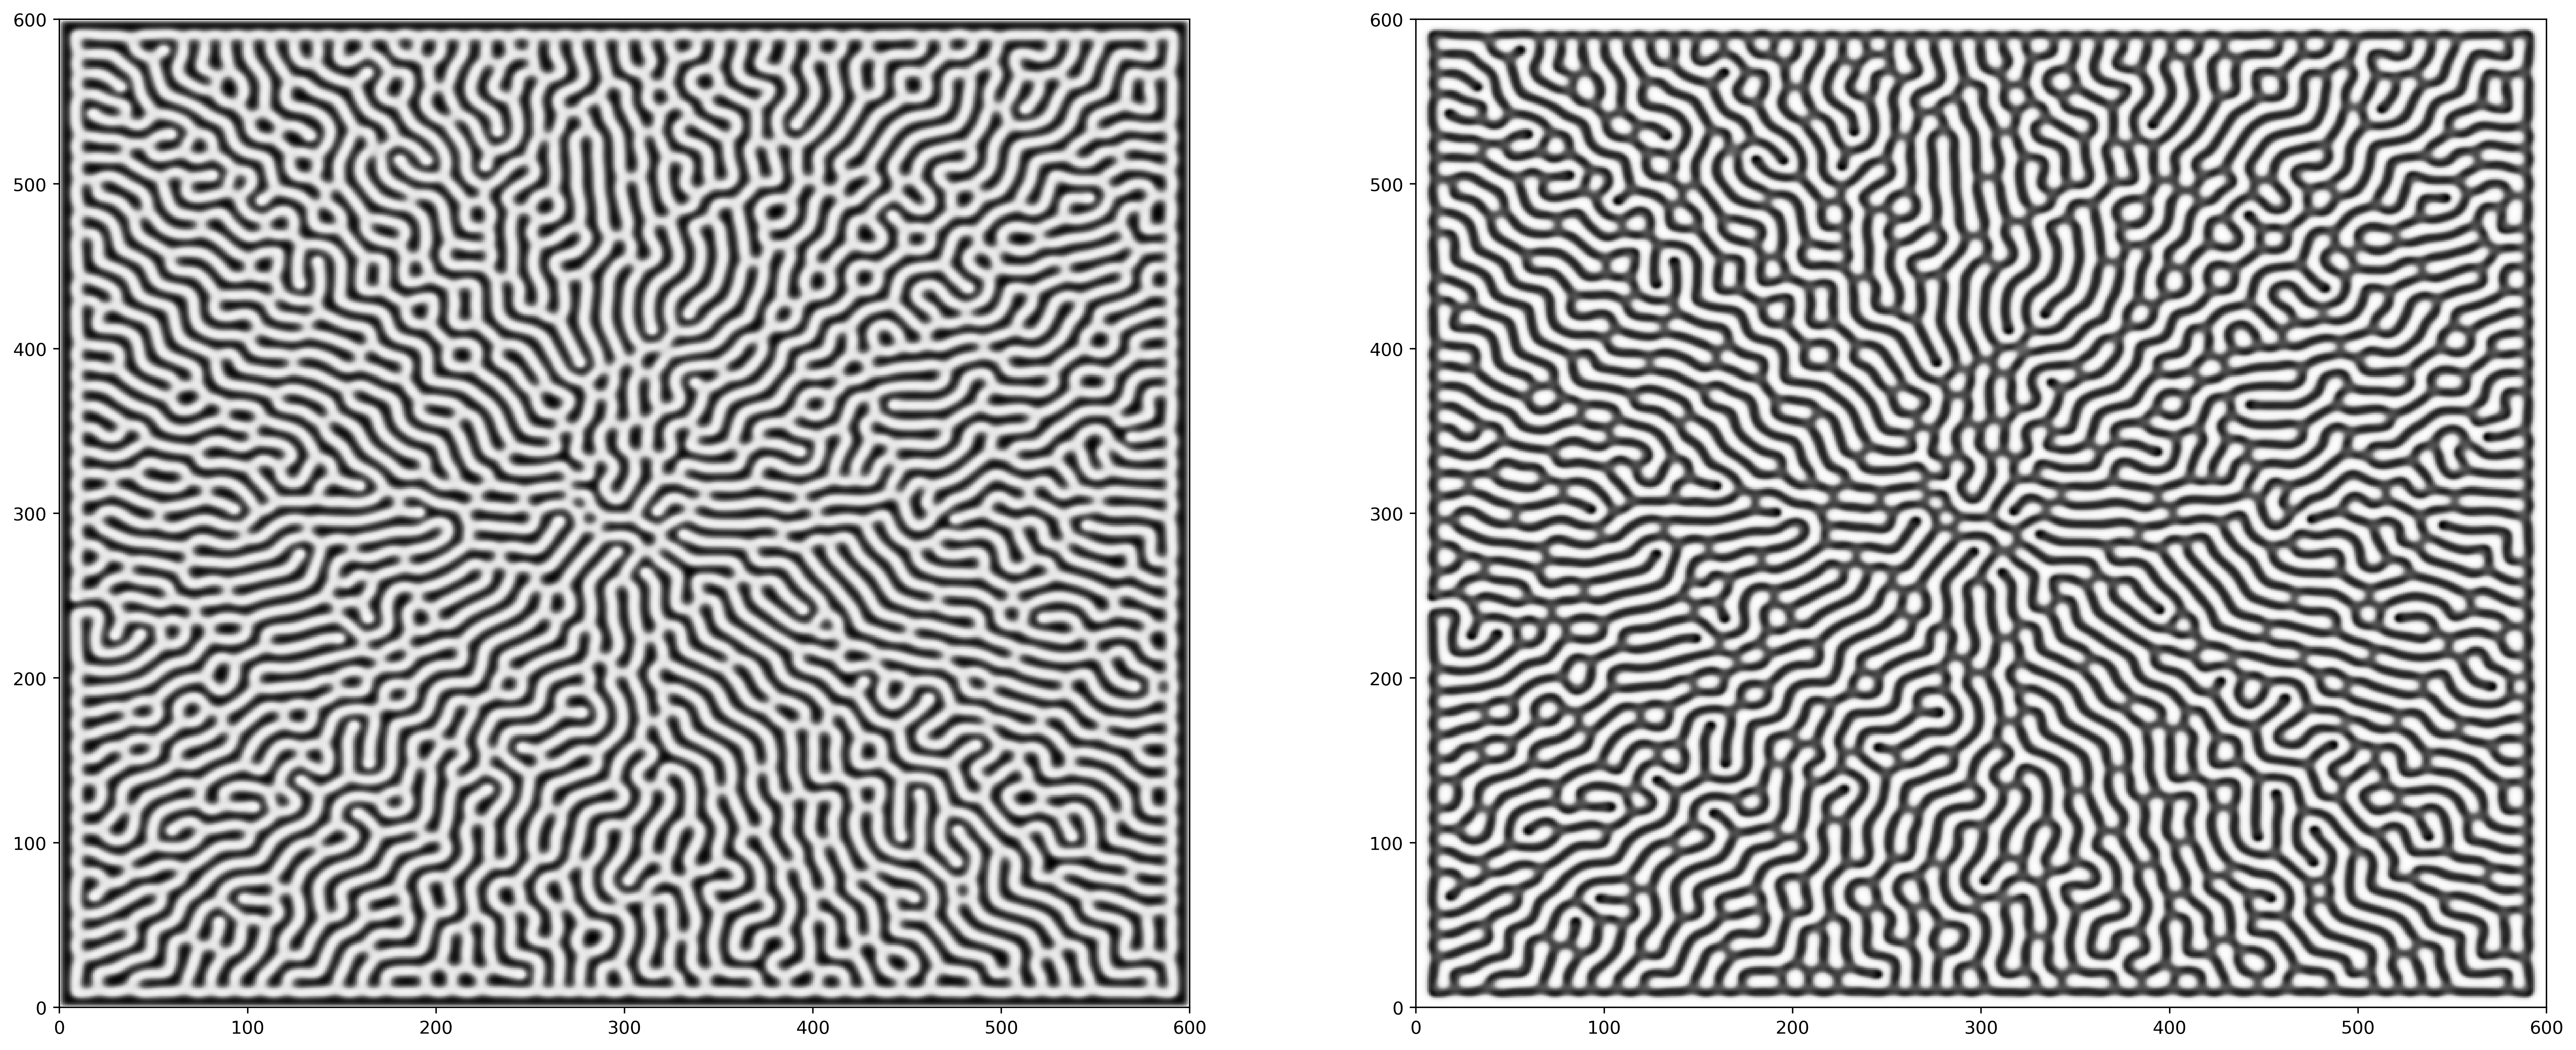

Elapsed time: 271.24 seconds


In [7]:
#### Parameters
Du, Dv, F, K = 0.16, 0.08, 0.060, 0.062
N = 600
iterations = 50000
fname = 'test'

# Create GSsolver
GSsolver = GS(N, fname)

# Record the start time
st = time.time()

# Create the laplacian
L = GSsolver.laplacian()

# Initialize the grid
GSsolver.initialize()

# Solve the equations and integrate
GSsolver.integrate(iterations, Du, Dv, F, K, L)

# Show output
GSsolver.plot()

# Record the end time
et = time.time()

# Print the elapsed time
print("Elapsed time: {:.2f} seconds".format(et - st))